In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/FlowersMP1B'
!ls "/content/drive/MyDrive/FlowersMP1B"

bahan  latih  validasi


In [ ]:
bahan_dir = os.path.join(base_dir, 'bahan')
train_dir = os.path.join(base_dir, 'latih')
validation_dir = os.path.join(base_dir, 'validasi')

# Menentukan direktori bahan mentah, training, dan validasi

In [ ]:
rose_dir = os.path.join(bahan_dir, 'rose/')
sunflower_dir = os.path.join(bahan_dir, 'sunflower/')
daisy_dir = os.path.join(bahan_dir, 'daisy/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar rose :', len(os.listdir(rose_dir)))
print('Jumlah gambar sunflower :', len(os.listdir(sunflower_dir)))
print('Jumlah gambar daisy :', len(os.listdir(daisy_dir)))

# Menampilkan jumlah gambar asli tiap kelas

Jumlah Data Train Tiap Kelas
Jumlah gambar rose : 250
Jumlah gambar sunflower : 250
Jumlah gambar daisy : 250


In [ ]:
train_rose = os.path.join(train_dir, 'rose/')
train_sunflower = os.path.join(train_dir, 'sunflower/')
train_daisy = os.path.join(train_dir, 'daisy/')

validation_rose = os.path.join(validation_dir, 'rose/')
validation_sunflower = os.path.join(validation_dir, 'sunflower/')
validation_daisy = os.path.join(validation_dir, 'daisy/')

# Menentukan direktori data training

In [ ]:
import random
import os
from shutil import copyfile

# Fungsi untuk membagi data ke folder training dan validasi
def train_val_split(source, train, val, train_ratio):
    total_size = len(os.listdir(source))
    print(f'Total size: {total_size}')

    # Hitung jumlah data train dan validasi
    train_size = int(train_ratio * total_size)
    val_size = total_size - train_size

    # Acak data dan bagi menjadi dua
    randomized = random.sample(os.listdir(source), total_size)
    train_files = randomized[:train_size]
    val_files = randomized[train_size:]

    # Buat folder jika belum ada
    os.makedirs(train, exist_ok=True)
    os.makedirs(val, exist_ok=True)

     # Bersihkan isi folder sebelum menyalin file
    clear_folder(train)
    clear_folder(val)

    # Salin file ke folder train
    for i in train_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(train, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

    # Salin file ke folder validasi
    for i in val_files:
        i_file = os.path.join(source, i)
        destination = os.path.join(val, i)
        if not os.path.exists(destination):
            copyfile(i_file, destination)

# Fungsi untuk menghapus isi folder
def clear_folder(folder):

    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            os.remove(file_path)

# Membagi data menjadi 90% train dan 10% validasi
train_ratio = 0.9

# Memanggil fungsi untuk masing-masing kelas bunga
source_00 = rose_dir
train_00 = train_rose
val_00 = validation_rose
train_val_split(source_00, train_00, val_00, train_ratio)

source_01 = sunflower_dir
train_01 = train_sunflower
val_01 = validation_sunflower
train_val_split(source_01, train_01, val_01, train_ratio)

source_02 = daisy_dir
train_02 = train_daisy
val_02 = validation_daisy
train_val_split(source_02, train_02, val_02, train_ratio)

Total size: 250
Total size: 250
Total size: 250


In [ ]:
print('Jumlah All rose       :', len(os.listdir(rose_dir)))
print('Jumlah Train rose     :', len(os.listdir(train_rose)))
print('Jumlah Val rose       :', len(os.listdir(validation_rose)))

# Menampilkan jumlah file setelah pembagian

Jumlah All rose       : 250
Jumlah Train rose     : 225
Jumlah Val rose       : 25


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Augmentasi data training
train_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

# Augmentasi data validasi (bisa dibuat lebih ringan jika overfitting)
val_datagen = ImageDataGenerator(
                    rescale= 1./255,
                    rotation_range= 30,
                    horizontal_flip= True,
                    shear_range = 0.3,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode='categorical'
)

# Membaca gambar dari folder dan diubah menjadi batch

Found 675 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.99):
      print('\nAkurasi mencapai 99%')
      self.model.stop_training = True

callback = myCallback()

# Callback: stop training jika akurasi sudah lebih dari 99%

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed=112),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     1,254,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       100,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         1,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,454,043 (5.55 MB)

 Trainable params: 1,454,043 (5.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

# menyusun model sebelum training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 9,
    epochs = 25,
    validation_data = val_generator,
    validation_steps = 1,
    verbose = 1,
    callbacks = [callback]
)
# Melatih model selama 25 epoch, tapi bisa berhenti jika akurasi > 99%

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 386ms/step - accuracy: 0.2791 - loss: 1.1184 - val_accuracy: 0.1000 - val_loss: 1.1266
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.3321 - loss: 1.0769 - val_accuracy: 0.6000 - val_loss: 0.9624
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.3635 - loss: 1.0820 - val_accuracy: 0.5000 - val_loss: 0.9873
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.3426 - loss: 1.0127 - val_accuracy: 0.5000 - val_loss: 1.7955
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.4560 - loss: 1.1189 - val_accuracy: 0.9000 - val_loss: 0.6173
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 611ms/step - accuracy: 0.5255 - loss: 1.0056 - val_accuracy: 0.6000 - val_loss: 0.7754
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 561ms/step - accuracy: 0.6642 - loss: 0.7332 - val_accuracy: 0.6000 - val_loss: 0.7818
Epoch 8/25
5/9 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.4457 - loss: 0.9131

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.4787 - loss: 0.9148 - val_accuracy: 0.8000 - val_loss: 0.8349
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.5175 - loss: 1.1998 - val_accuracy: 0.5000 - val_loss: 0.9759
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - accuracy: 0.5065 - loss: 0.9061 - val_accuracy: 0.6000 - val_loss: 0.8589
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.5819 - loss: 0.8491 - val_accuracy: 0.3000 - val_loss: 1.0184
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.7089 - loss: 0.6884 - val_accuracy: 0.7000 - val_loss: 0.8802
Epoch 13/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 590ms/step - accuracy: 0.7280 - loss: 0.8794 - val_accuracy: 0.8000 - val_loss: 0.7761
Epoch 14/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - accuracy: 0.7502 - loss: 0.7309 - val_accuracy: 1.0000 - val_loss: 0.2768
Epoch 15/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.7299 - loss: 0.8132 - val_accuracy: 0.9000 - val_loss: 0.4

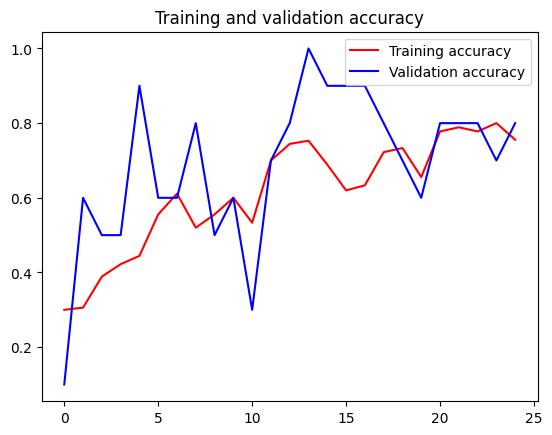

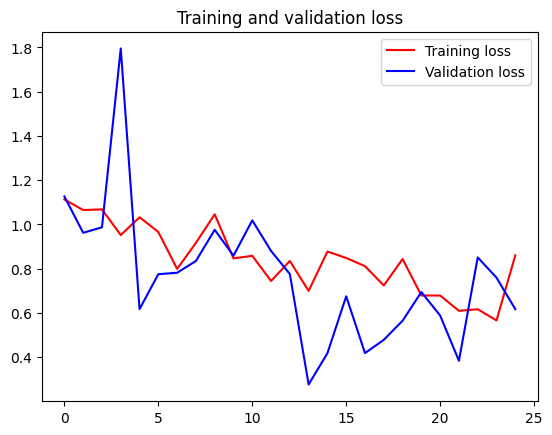

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc = 'best')
plt.show()

# Visualisasi grafik akurasi dan loss

Saving 14087947408_9779257411_n.jpg to 14087947408_9779257411_n.jpg


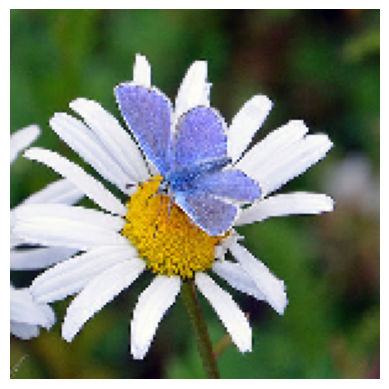

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
📷 Gambar: 14087947408_9779257411_n.jpg
✅ Dikenali sebagai: daisy (77.56%)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from google.colab import files

# Dapatkan label class yang konsisten
class_indices = train_generator.class_indices
class_list = list(class_indices.keys())

# Upload dan prediksi
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Preprocess image (harus dibagi 255!)
    x = image.img_to_array(img)
    x = x / 255.0  # Normalisasi
    x = np.expand_dims(x, axis=0)

    # Predict
    pred = model.predict(x)
    pred_index = np.argmax(pred)
    pred_label = class_list[pred_index]

    print(f"📷 Gambar: {fn}")
    print(f"✅ Dikenali sebagai: {pred_label} ({pred[0][pred_index]*100:.2f}%)")
